# **Loading the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv("data.csv")

In [2]:
df.shape

(9833, 18)

# **Dataset Explorations** 

In [3]:
# Dataset first five rows
display(df.head())
# Each column information
display(df.info())
# Description of all numeric data columns 
display(df.describe())

,date,customer_id,region_id,region_preference_product,customer_estimated_product_adoption,customer_estimated_size,region_preference_competitor_1,region_preference_competitor_2,region_preference_competitor_3,region_preference_competitor_4,region_preference_competitor_5,region_preference_competitor_6,region_preference_competitor_7,number_of_days_since_last_promotion,promotional_activity_1,promotional_activity_2,region_teenager_percent,sales
0,01-01-19,1,1,1,High,Big,0,1,0,0,1,0,1,23,0,1,19.319346,117
1,01-02-19,1,1,1,High,Big,0,1,0,0,1,0,1,51,0,0,19.319346,113
2,01-03-19,1,1,1,High,Big,0,1,0,0,1,0,1,19,0,2,19.319346,117
3,01-04-19,1,1,1,High,Big,0,1,0,0,1,0,1,21,0,1,19.319346,117
4,01-05-19,1,1,1,High,Big,0,1,0,0,1,0,1,3,0,1,19.319346,116


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9833 entries, 0 to 9832
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 9833 non-null   object 
 1   customer_id                          9833 non-null   int64  
 2   region_id                            9833 non-null   int64  
 3   region_preference_product            9833 non-null   int64  
 4   customer_estimated_product_adoption  9213 non-null   object 
 5   customer_estimated_size              9110 non-null   object 
 6   region_preference_competitor_1       9833 non-null   int64  
 7   region_preference_competitor_2       9833 non-null   int64  
 8   region_preference_competitor_3       9833 non-null   int64  
 9   region_preference_competitor_4       9833 non-null   int64  
 10  region_preference_competitor_5       9833 non-null   int64  
 11  region_preference_competitor_6

None

,customer_id,region_id,region_preference_product,region_preference_competitor_1,region_preference_competitor_2,region_preference_competitor_3,region_preference_competitor_4,region_preference_competitor_5,region_preference_competitor_6,region_preference_competitor_7,number_of_days_since_last_promotion,promotional_activity_1,promotional_activity_2,region_teenager_percent,sales
count,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000,9833.000000
mean,354.699685,178.245398,0.230143,-0.001220,0.506356,-0.117665,0.148480,0.185193,0.219567,0.171972,49.534018,0.234313,0.639988,12.922933,97.860470
std,207.823938,129.323381,0.710707,0.571565,0.499985,0.443154,0.674059,0.691969,0.706600,0.685799,58.858083,0.516228,0.739969,3.800483,38.605151
min,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,176.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,10.361176,103.000000
50%,352.000000,162.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,11.637035,107.000000
75%,527.000000,284.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,64.000000,0.000000,1.000000,15.657936,115.000000
max,807.000000,472.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,535.000000,5.000000,5.000000,24.335884,243.000000


In [4]:
# Sort the dataframe by date column
df = df.sort_values(by="date", key=pd.to_datetime)

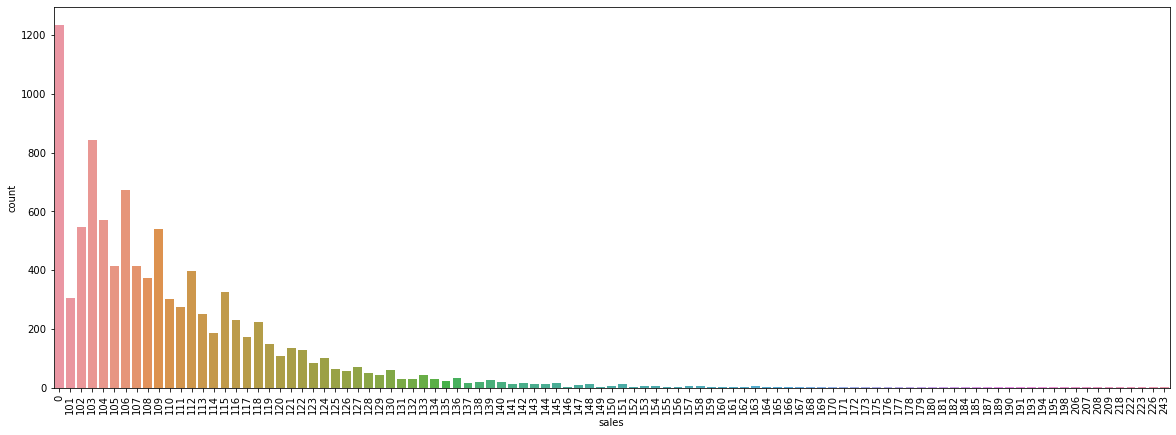

In [5]:
# Display the count Plot of the Company Products 
fig, ax  = plt.subplots(figsize=(20,7))
ax=sns.countplot(x='sales', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

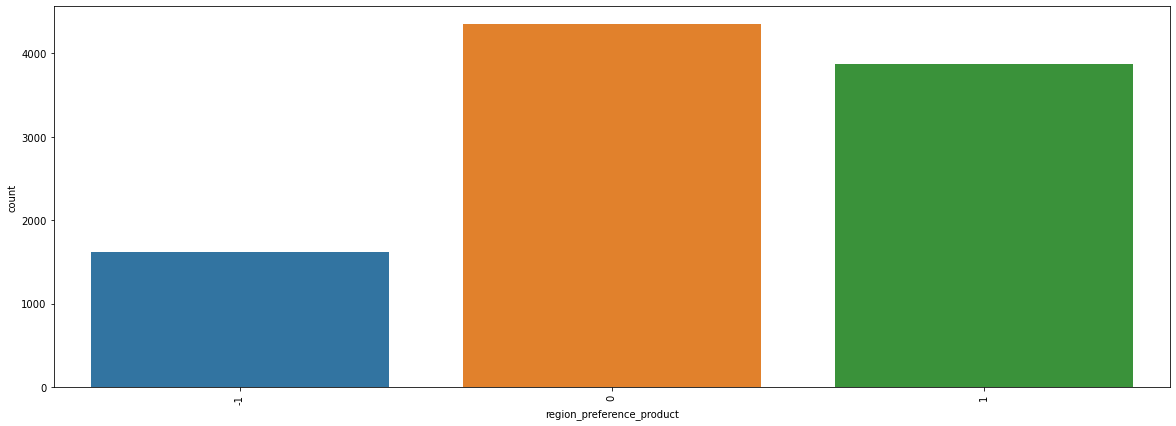

In [6]:
# Display the count Plot of the region_preference product 
fig, ax  = plt.subplots(figsize=(20,7))
ax=sns.countplot(x='region_preference_product', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

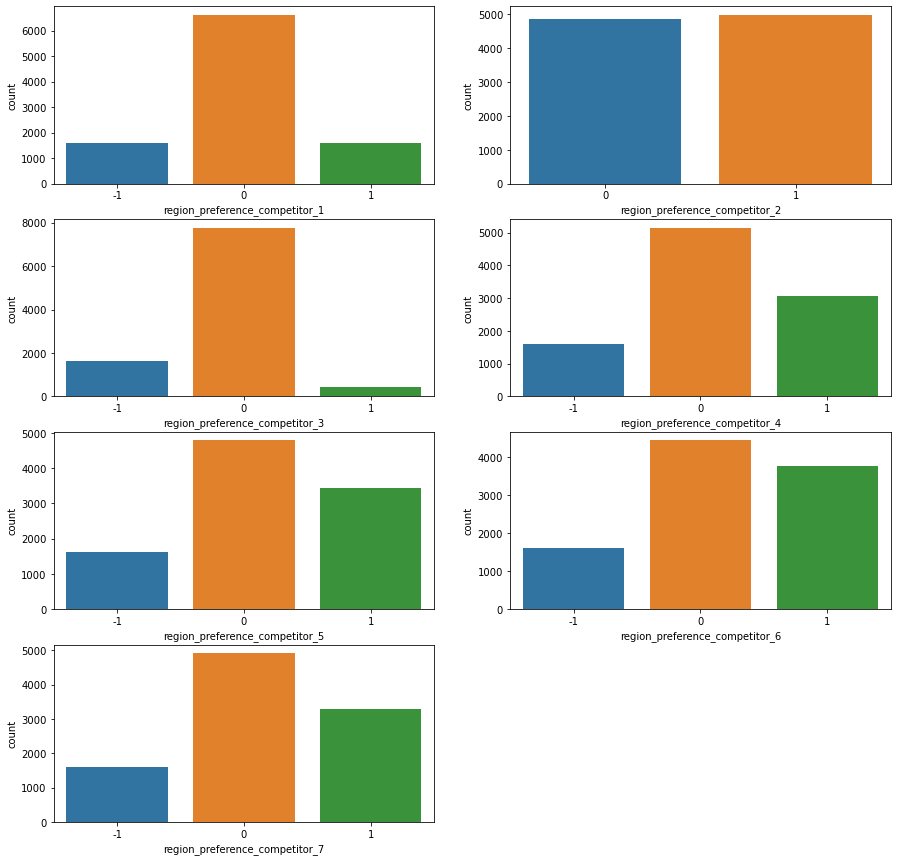

In [7]:
# Boolean (0/1) indicating whether the competitor’s video game [x] sold more on average in this region than in the other regions; the value –1 
plt.figure(figsize = (15,15))
for n, col in enumerate(['region_preference_competitor_1','region_preference_competitor_2','region_preference_competitor_3','region_preference_competitor_4','region_preference_competitor_5','region_preference_competitor_6','region_preference_competitor_7']):
    plt.subplot(4,2,n + 1)
    ax = sns.countplot(x=col, data=df)
    ax.set_xticklabels(ax.get_xticklabels());

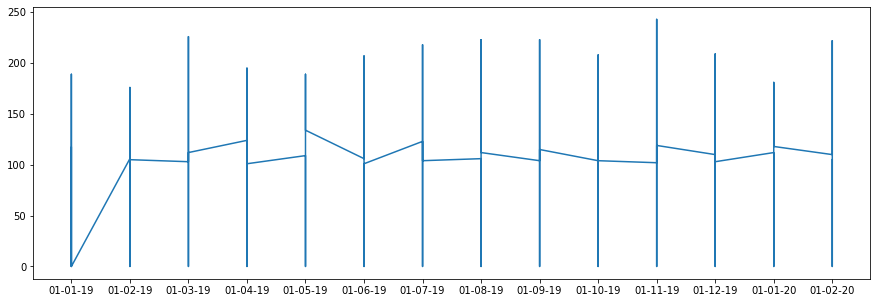

In [8]:
# Sales from 2019 to 2020
plt.figure(figsize = (15,5))
plt.plot(df.date, df.sales)

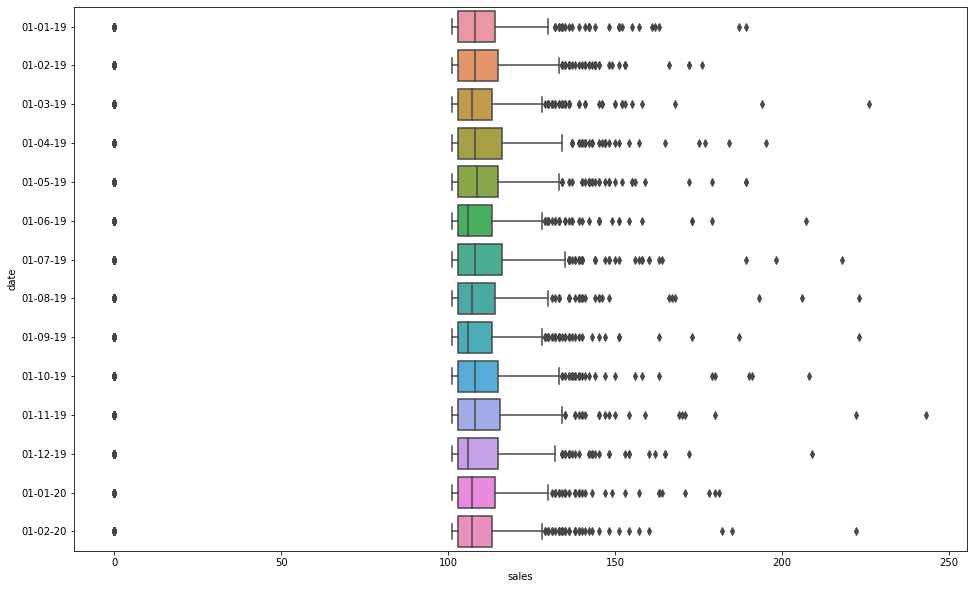

In [9]:
# Display the Price ranges of different company products
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x=df['sales'],y=df['date'],data=df)

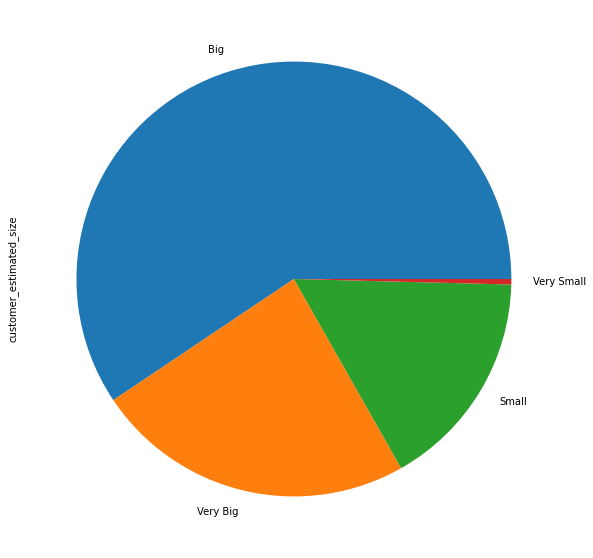

In [10]:
# Display the customer_estimated size in dataset 
df['customer_estimated_size'].value_counts().plot(kind = 'pie', figsize = (10,10))

# **Applying the preprocessings**

In [11]:
# Removing the useless columns
df = df.drop(labels =  ['region_id', 'region_preference_product', 'region_preference_competitor_1',
                        'region_preference_competitor_2','region_preference_competitor_3',
                        'region_preference_competitor_4','region_preference_competitor_5',
                        'region_preference_competitor_6','region_preference_competitor_7',
                        'number_of_days_since_last_promotion'], axis=1)

In [12]:
# Label encode the object type column 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['customer_estimated_product_adoption'] = le.fit_transform(df['customer_estimated_product_adoption'])
df['customer_estimated_size'] = le.fit_transform(df['customer_estimated_size'])

In [13]:
# splitting the date column into three columns as year, month and date
df.date = pd.to_datetime(df.date, format= "%d-%m-%y")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop('date', axis = 1)

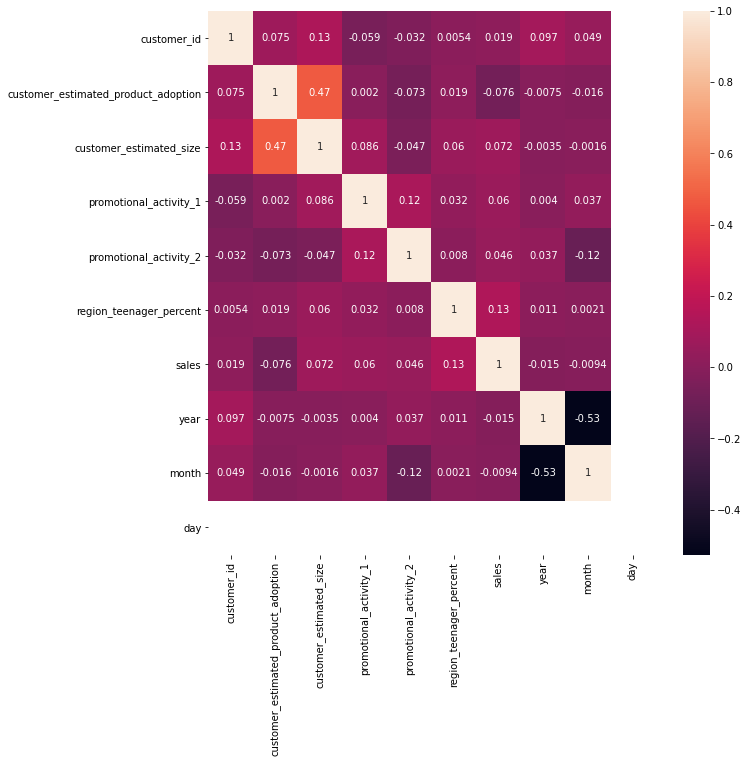

In [14]:
# Showing the Correlational of the dataset
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
# Seperating the features and labels
X = df.loc[:,['customer_id', 'customer_estimated_product_adoption',
              'customer_estimated_size', 'promotional_activity_1',
              'promotional_activity_2', 'region_teenager_percent',
              'year','month', 'day']]
y = df.loc[:,'sales']

In [16]:
# Scaling the whole dataset to a range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Splitting the dataset into 90 % train and 10 % test data 
limit = int(len(y) * 0.9)
X_train = X[:limit]
y_train = y.iloc[:limit].values
X_test  = X[limit:]
y_test  = y.iloc[limit:].values

# Here is the shapes of the train and test dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8849, 9) (8849,)
(984, 9) (984,)


In [27]:
# Designing the whole Model Class for the training and predictions 
class Machine_Learning_Model():
    def __init__( self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    # Function for model training
    def fit( self,X,Y):
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradient descent learning
        for i in range( self.iterations):
            self.update_weights()
        return self
    # Helper function to update weights in gradient descent
    def update_weights(self):
        Y_pred = self.predict(self.X)
        # calculate gradients 
        dW =- ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db =- 2 * np.sum( self.Y - Y_pred ) / self.m 
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    # Hypothetical function h( x ) 
    def predict( self, X ) :
        return X.dot( self.W ) + self.b    

In [28]:
# Applying the Model for Machine Learning Application
model = Machine_Learning_Model(learning_rate = 0.001, iterations = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
# Here are we Evaluating the model Performance
print("Score of Model: ", r2_score(y_test, y_pred))
mse_model = mean_squared_error(np.exp(y_test), np.exp(y_pred))
print("RMSE  of Model: {} ".format(np.round(np.sqrt(mse_model)),4))

Score of Model:  0.04687316235672179
RMSE  of Model: 8.258048578403306e+94 


Predicted values  [103.61  81.58  94.71]
Real values       [119 118 107]
Trained W         0.81
Trained b         97.99


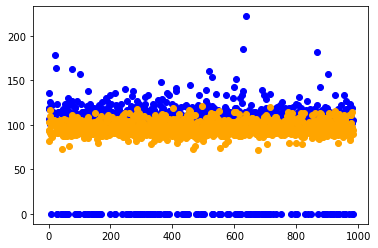

In [31]:
Y_pred = model.predict( X_test)
print( "Predicted values ", np.round( y_pred[:3], 2 ) ) 
print( "Real values      ", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 
plt.scatter( range(len(y_test)), y_test, color = 'blue' )
plt.scatter( range(len(y_pred)), y_pred, color = 'orange' )

# Test for the May month

In [37]:
# Extract the May
month_number = 5

X =  df[df['month'] == month_number].loc[:,['customer_id', 'customer_estimated_product_adoption',
                                      'customer_estimated_size', 'promotional_activity_1',
                                      'promotional_activity_2', 'region_teenager_percent',
                                      'year','month', 'day']]
y =  df[df['month'] == month_number].loc[:,'sales']

Predicted values  [97.85 96.93 94.06]
Real values       [119 118 107]
Trained W         0.81
Trained b         97.99


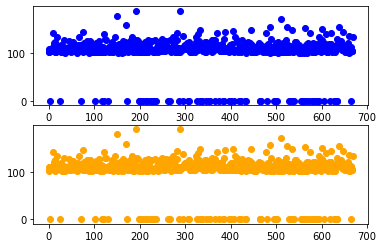

In [38]:
X = scaler.fit_transform(X)
y_pred = model.predict(X)
print( "Predicted values ", np.round( y_pred[:3], 2 ) ) 
print( "Real values      ", y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 
plt.subplot(2,1,1)
plt.scatter( range(len(X)), y, color = 'blue' )
plt.subplot(2,1,2)
plt.scatter( range(len(X)), y, color = 'orange' )